# Lecture 09의 데모

### Lecture 09의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec13.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec14.ipynb

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## **Comparison** ##

In [ ]:
x = 2
x

2

In [ ]:
# Boolean 값 출력
x > 4

False

In [ ]:
# 와 이게 되네
1 < x < 3

True

In [ ]:
type(1<x<3)

bool

In [ ]:
# true는 틀린 표기 True임
True

True

In [ ]:
False

False

In [ ]:
True == False

False

## **Comparisons with arrays**

In [ ]:
s = make_array('John', 'John', 'Jack', 'John')
s

array(['John', 'John', 'Jack', 'John'],
      dtype='<U4')

In [ ]:
# 각각의 element에 대해 비교 연산이 가능하다.
s == 'John'

array([ True,  True, False,  True], dtype=bool)

In [ ]:
True + 1 + 0

2

In [ ]:
# 내가 원하는 데이터의 개수를 counting할때 좋음!
sum(s == 'John')

3

In [ ]:
sum(s != 'John')

1

In [ ]:
a = (s == 'John')
a

array([ True,  True, False,  True], dtype=bool)

In [ ]:
type(2)

int

In [ ]:
tips = Table.read_table('tips.csv')
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


In [ ]:
tips.where('size', are.above(2)).num_rows

84

In [ ]:
# 다르게 풀어보자
sum(tips.column('size') > 2)

84

In [ ]:
maple_syrup = 'bad dog'

In [ ]:
maple_syrup == 'good dog'

False

In [ ]:
# 대소문자 구별함
maple_syrup == 'bad Dog'

False

In [ ]:
1 + 2 + 3 == 4 + 2

True

In [ ]:
# Assignment와는 구분하자
1 + 2 + 3 = 4 + 2

SyntaxError: ignored

In [ ]:
np.count_nonzero(s == 'John')

3

In [ ]:
x = np.arange(20, 31)
x

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
x > 26

array([False, False, False, False, False, False, False,  True,  True,
        True,  True], dtype=bool)

In [ ]:
sum(x>26)

4

## **Rows & Apply**

In [ ]:
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


In [ ]:
r = tips.row(0)
r

Row(total_bill=16.989999999999998, tip=1.01, sex='Female', smoker='No', day='Sun', time='Dinner', size=2)

In [ ]:
sum(r)

UFuncTypeError: ignored

In [ ]:
# 각각이 ndarray로 묶여서 나온다.
r2 = tips.row(np.arange(0,3))
r2

Row(total_bill=array([ 16.99,  10.34,  21.01]), tip=array([ 1.01,  1.66,  3.5 ]), sex=array(['Female', 'Male', 'Male'],
      dtype='<U6'), smoker=array(['No', 'No', 'No'],
      dtype='<U3'), day=array(['Sun', 'Sun', 'Sun'],
      dtype='<U4'), time=array(['Dinner', 'Dinner', 'Dinner'],
      dtype='<U6'), size=array([2, 3, 3]))

In [ ]:
# 첫번째 column을 가져 오겠다 -> 인덱스를 적는거보다는 label을 직접 적는것이 좋음
# r.item('total_bill')
r.item(0)

16.989999999999998

In [ ]:
r2.item('total_bill')

array([ 16.99,  10.34,  21.01])

In [ ]:
tips.select(0,1,6).show(2)

total_bill,tip,size
16.99,1.01,2
10.34,1.66,3


In [ ]:
tips.pivot(4,5)

time,Fri,Sat,Sun,Thur
Dinner,12,87,76,1
Lunch,7,0,0,61


In [ ]:
p = tips.pivot(4,5)

# 처음은 str type이라서 그걸 드랍하고 더해준것임
sum(p.drop(0).row(1))

68

In [ ]:
# 앞에서 배운 apply와 구분!
# 행에 대해서 연산이 작용한 것임
p.drop(0).apply(sum)

array([176,  68])

In [ ]:
p.with_column('Total', p.drop(0).apply(sum))

time,Fri,Sat,Sun,Thur,Total
Dinner,12,87,76,1,176
Lunch,7,0,0,61,68


In [ ]:
p.drop(0).row(0)

Row(Fri=12, Sat=87, Sun=76, Thur=1)

In [ ]:
make_array([12,87,76,1])

array([[12, 87, 76, 1]], dtype=object)

In [ ]:
make_array([12,87,76,1]) + 3

array([[15, 90, 79, 4]], dtype=object)

In [ ]:
# Row를 쓴뒤에 더하는 건 안됨! 튜플이라서..
p.drop(0).row(0) + 3

TypeError: ignored

In [ ]:
list(p.drop(0).row(0)) + 3

TypeError: ignored

In [ ]:
np.array(p.drop(0).row(0)) + 3

array([15, 90, 79,  4])

In [ ]:
# 인덱스에 해당하는 행을 삭제한다
p.exclude(1)

time,Fri,Sat,Sun,Thur
Dinner,12,87,76,1


In [ ]:
tips.show(2)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
def f(n):
  return n > 2

# 뒤에 없으면 각 행에 대해 적용되고
# 뒤에 뭔가 있으면 column에 대해서 적용된다.
tips.apply(f,  'size')

array([False,  True,  True, False,  True,  True, False,  True, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,

In [ ]:
def g(r):
    return sum(r) > 2

p.drop(0).apply(g)

array([ True,  True], dtype=bool)

## **Conditional Statements**

In [ ]:
x = 20
s = 'You are 20'

In [ ]:
if x > 18:
  s = 'You are legally vote'

# s가 바뀜
s

'You are legally vote'

In [ ]:
if x >= 21:
  s = 'You are legally drink.'
s

'You are legally vote'

In [ ]:
def age(x):
  if x >= 18:
    return 'You are legally vote.'
  if x >= 21:
    return 'You are legally drink.'

In [ ]:
age(20)

'You are legally vote.'

In [ ]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18: # This only gets checked if the "if" condition was false
        return 'You can legally vote.'
    else: # only runs if all the if/elif conditions was false
        return 'You can legally drink milk.'

In [ ]:
trip = Table().read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [ ]:
# 이런 식으로 Dynamic하게 만들어내는 것임
def trip_kind(start, end):
    if start == end:
        return 'round trip'
    else:
        return 'one way'

kinds = trip.with_column('Trip Kind', trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Trip Kind
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,one way
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,one way
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,one way


In [ ]:
kinds.where('Duration', are.below(600)).pivot('Trip Kind', 'Start Station')

Start Station,one way,round trip
2nd at Folsom,6821,25
2nd at South Park,6484,98
2nd at Townsend,9513,83
5th at Howard,5752,36
Adobe on Almaden,439,8
Arena Green / SAP Center,382,18
Beale at Market,5750,32
Broadway St at Battery St,4482,59
California Ave Caltrain Station,39,12
Castro Street and El Camino Real,1005,10


## **Simulation**

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [ ]:
# A start (work in progress)
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [ ]:
one_round(4,3)

1

In [ ]:
one_round(2,6)

In [ ]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif my_roll == your_roll:
        return 0
    else:
        return -1

In [ ]:
one_round(1, 1)

0

In [ ]:
one_round(7, -1)

1

### **Random Selection**

In [ ]:
mornings = make_array('wake up', 'sleep in')

In [ ]:
np.random.choice(mornings)

'sleep in'

We can also pass an argument that specifies how many times to make a random choice:

In [ ]:
# 할때마다 결과값 달리 나옴
np.random.choice(mornings, 7)

array(['sleep in', 'wake up', 'sleep in', 'sleep in', 'sleep in',
       'wake up', 'sleep in'],
      dtype='<U8')

In [ ]:
np.random.choice(mornings, 10) == 'wake up'

array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool)

### **Simulating the roll of a die**

In [ ]:
die_faces = np.arange(1, 7)

In [ ]:
np.random.choice(die_faces)

5

In [ ]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [ ]:
simulate_one_round()

-1

### **Appending Arrays**

### **Repeated Betting**

## **`For` Statements**

### **Simulating heads in 100 coin tosses**

In [ ]:
# Simulate one outcome


In [ ]:
# Decide how many times you want to repeat the experiment


In [ ]:
# Simulate that many outcomes


### **Chance of At Least One Success in Independently Repeated Success/Failure Trials**

In [ ]:
# Chance of no sixes in 4 rolls of a die


In [ ]:
# Chance of at least one six in 4 rolls of a die


In [ ]:
# Chance of at least one six in n rolls of a die


## **The Monty Hall Problem**

In [ ]:
goats = make_array('first goat', 'second goat')
goats

array(['first goat', 'second goat'],
      dtype='<U11')

In [ ]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [ ]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [ ]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [ ]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [ ]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())

In [ ]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car


In [ ]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3293
first goat,3393
second goat,3314


In [ ]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6707
first goat,1646
second goat,1647


In [ ]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3293,6707
first goat,3393,1646
second goat,3314,1647


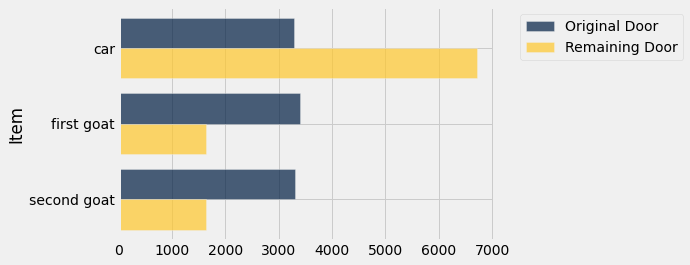

In [ ]:
combined.barh(0)